In [7]:
import numpy as np
import pandas as pd

X = pd.read_csv('logisticX.csv').values
y = pd.read_csv('logisticY.csv').values

def standardize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

X = standardize_features(X)
X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []
    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs

theta = np.zeros((X.shape[1], 1))
alpha = 0.1
num_iters = 100
theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
print("Cost function value after convergence:", costs[-1])
print("Learning parameter value after convergence:")
print(theta)

Cost function value after convergence: 0.28178095076608334
Learning parameter value after convergence:
[[ 0.0630726 ]
 [ 1.23514239]
 [-1.27158345]]


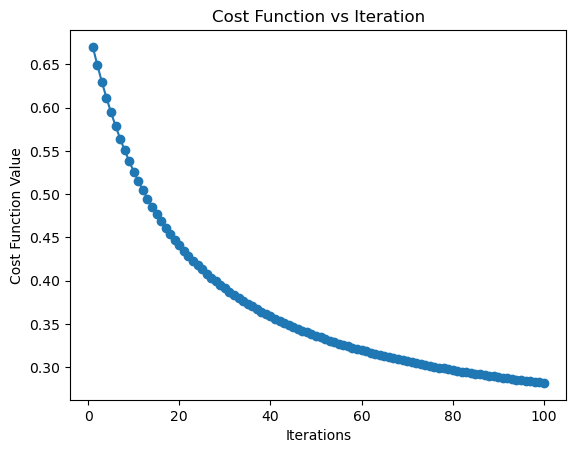

Cost function value after convergence: 0.28178095076608334
Learning parameter value after convergence:
[[ 0.0630726 ]
 [ 1.23514239]
 [-1.27158345]]


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('logisticX.csv').values
y = pd.read_csv('logisticY.csv').values

def standardize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

X = standardize_features(X)
X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []
    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs

theta = np.zeros((X.shape[1], 1))
alpha = 0.1
num_iters = 100

theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
plt.plot(range(1, num_iters + 1), costs, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iteration')
plt.show()

print("Cost function value after convergence:", costs[-1])
print("Learning parameter value after convergence:")
print(theta)

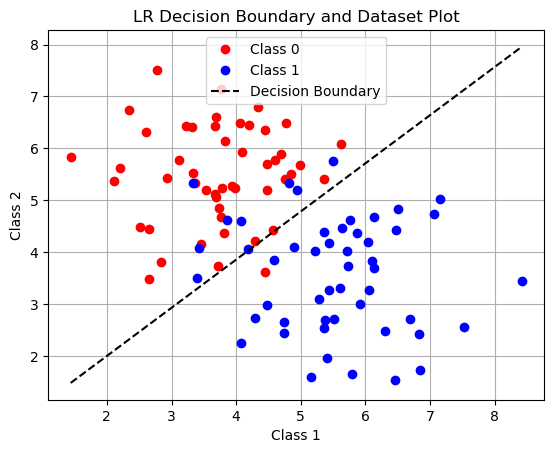

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('logisticX.csv').values
y = pd.read_csv('logisticY.csv').values

def standardize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

X_standardized = standardize_features(X)
X_b = np.hstack((np.ones((X_standardized.shape[0], 1)), X_standardized))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def decision_boundary(X, theta):
    return -(theta[0] + theta[1] * X) / theta[2]

theta_initial = np.zeros((X_b.shape[1], 1))
alpha = 0.1
num_iters = 1000
theta_final, _ = gradient_descent(X_b, y, theta_initial, alpha, num_iters)
plt.plot(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], 'ro', label='Class 0')
plt.plot(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], 'bo', label='Class 1')
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = decision_boundary(x_vals, theta_final)

plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
plt.xlabel('Class 1')
plt.ylabel('Class 2')
plt.title('LR Decision Boundary and Dataset Plot')
plt.legend()
plt.grid(True)
plt.show()

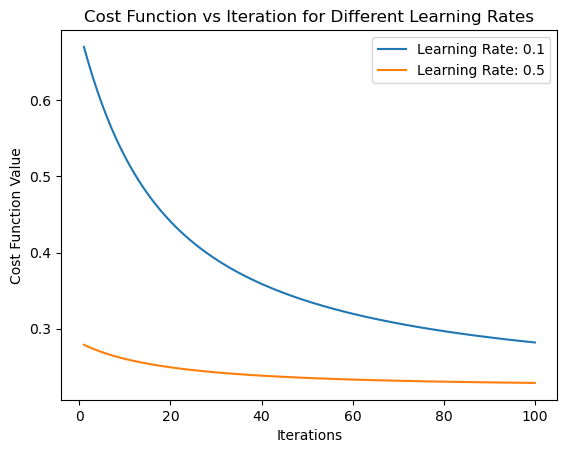

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('logisticX.csv').values
y = pd.read_csv('logisticY.csv').values

def standardize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

X_standardized = standardize_features(X)
X_b = np.hstack((np.ones((X_standardized.shape[0], 1)), X_standardized))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []
    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs

theta_initial = np.zeros((X_b.shape[1], 1))
num_iters = 100
alpha_1 = 0.1
alpha_2 = 0.5
theta_1, costs_1 = gradient_descent(X_b, y, theta_initial, alpha_1, num_iters)
theta_2, costs_2 = gradient_descent(X_b, y, theta_initial, alpha_2, num_iters)

plt.plot(range(1, num_iters + 1), costs_1, label=f'Learning Rate: {alpha_1}')
plt.plot(range(1, num_iters + 1), costs_2, label=f'Learning Rate: {alpha_2}')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.legend()
plt.show()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def standardize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []
    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs

def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(X @ theta)
    predictions = (probabilities >= threshold).astype(int)
    return predictions

def confusion_matrix_calc(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[true_negatives, false_positives], [false_negatives, true_positives]])

def accuracy_calc(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision_calc(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))  
    if true_positives + false_positives == 0:
        return 0 
    return true_positives / (true_positives + false_positives)

def recall_calc(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))  
    if true_positives + false_negatives == 0:
        return 0
    return true_positives / (true_positives + false_negatives)

def f1_score_calc(y_true, y_pred):
    precision = precision_calc(y_true, y_pred)
    recall = recall_calc(y_true, y_pred) 
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

X = pd.read_csv('logisticX.csv').values
y = pd.read_csv('logisticY.csv').values
X_normalized = standardize_features(X)
X_b = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))
theta_initial = np.zeros((X_b.shape[1], 1))
num_iters = 100
alpha = 0.1
theta, _ = gradient_descent(X_b, y, theta_initial, alpha, num_iters)

y_pred = predict(X_b, theta)
cm = confusion_matrix_calc(y, y_pred)
accuracy = accuracy_calc(y, y_pred)
precision = precision_calc(y, y_pred)
recall = recall_calc(y, y_pred)
f1 = f1_score_calc(y, y_pred)

print("Confusion Matrix with Learning Rate(0.1) : ")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix with Learning Rate(0.1) : 
[[46  3]
 [ 8 42]]
Accuracy: 0.8888888888888888
Precision: 0.9333333333333333
Recall: 0.84
F1 Score: 0.8842105263157894
